In [36]:
import tensorflow
from tensorflow.keras.datasets import mnist
import numpy as np
import seaborn as sns

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

pic_size = 48
base_path_train = r"C:\Users\Lenovo_1\Desktop\Facial recog\images\train"
base_path_test = r"C:\Users\Lenovo_1\Desktop\Facial recog\images\test"
batch_size = 64
class_names = {"angry","contempt","disgust","fear","happy","sadness","surprise"
    
}



datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path_train,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path_test,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)




Found 981 images belonging to 7 classes.
Found 506 images belonging to 7 classes.


In [46]:
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

nb_classes = 7
model = Sequential()
model.add(Conv2D(64,(2,2), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution layer
model.add(Conv2D(64,(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#3rd Layer

model.add(Conv2D(64,(2,2), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 20
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/20
15/15 [==============================] - 11s 761ms/step - loss: 2.2605 - accuracy: 0.2094 - val_loss: 2.5257 - val_accuracy: 0.1719
Epoch 2/20
15/15 [==============================] - 11s 703ms/step - loss: 1.7348 - accuracy: 0.3773 - val_loss: 2.1331 - val_accuracy: 0.3371
Epoch 3/20
15/15 [==============================] - 11s 704ms/step - loss: 1.4312 - accuracy: 0.5038 - val_loss: 1.7439 - val_accuracy: 0.3683
Epoch 4/20
15/15 [==============================] - 11s 754ms/step - loss: 1.1963 - accuracy: 0.5692 - val_loss: 1.4989 - val_accuracy: 0.5000
Epoch 5/20
15/15 [==============================] - 11s 732ms/step - loss: 1.1707 - accuracy: 0.5845 - val_loss: 1.3656 - val_accuracy: 0.6071
Epoch 6/20
15/15 [==============================] - 10s 699ms/step - loss: 0.9660 - accuracy: 0.6667 - val_loss: 1.2162 - val_accuracy: 0.6607
Epoch 7/20
15/15 [==============================] - 11s 712ms/step - loss: 0.9100 - accuracy: 0.7082 - val_loss: 1.0597 - val_accuracy: 0.7299

In [65]:
predictions = model.predict_generator(generator=validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes


<Figure size 432x288 with 0 Axes>

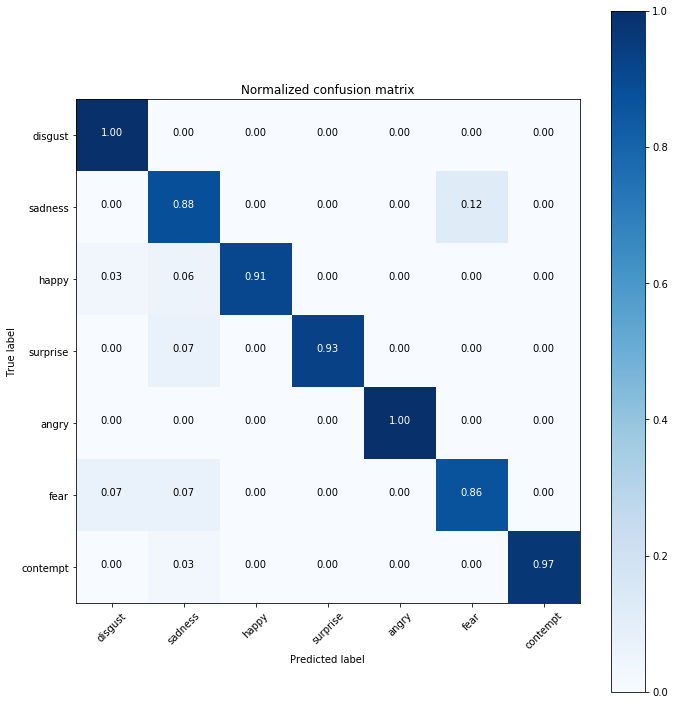

In [52]:
from sklearn.metrics import confusion_matrix
import itertools

class_names = {"angry","contempt","disgust","fear","happy","sadness","surprise"
    
}

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, title='Normalized confusion matrix')
plt.show()

In [76]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

ModuleNotFoundError: No module named 'model_json'